# Compute exponential growth from SPARK3D
This script showcases how the exponential growth factor from a bunch of SPARK3D simulations can be calculated.
The original data can be manually exported from SPARK3D, or automatically generated (command line SPARK3D).

## Pre-requisites
Import some objects:

In [1]:
from pathlib import Path

import numpy as np

from simultipac.simulation_results.simulations_results import (
    SimulationsResults,
    SimulationsResultsFactory,
)

[INFO    ] [log_manager.py      ] Starting log for Simultipac - Version: 2.0.1.dev22+g1f37471.d20250203, Commit: 93f0bda7f016d554825f3c97148c833b46dd0da1


## Loading the data
The factory is used to create the SimulationsResults objects. You will need to provide the RF frequency in GHz.

In [2]:
factory = SimulationsResultsFactory("SPARK3D", freq_ghz=1.30145)

The SimulationsResults object will hold all the data. You must provide:
1. The path to the file holding the results. Check [dedicated documentation](https://simultipac.readthedocs.io/en/latest/simultipac/simultipac.spark3d.simulation_results.html#simultipac.spark3d.simulation_results.Spark3DResultsFactory.from_file) for the format of the results file.
2. The accelerating fields in V/m.

<div class="alert alert-info">
    As for now, it is not possible to provide the RMS power instead of the accelerating field.
    It is a very straightforward implementation, but I never had the use for it.
</div>

In [3]:
results: SimulationsResults = factory.create(
    filepath=Path("../../../examples/spark/time_results.csv"),
    e_acc=np.linspace(1e6, 3e7, 30),
)

You can visualize the evolution of the population with the SimulationsResults.plot method.
Here, we only plot the first, 16th and 26th simulations.

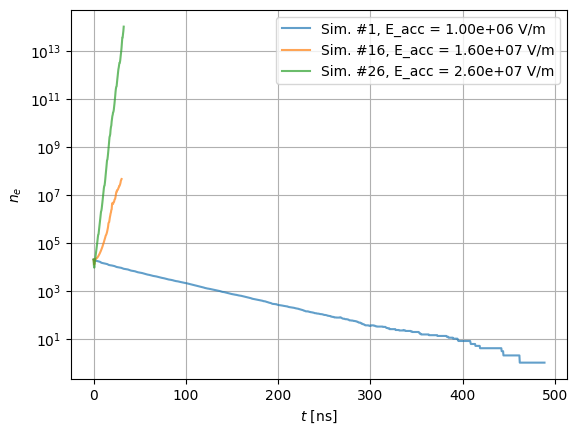

In [4]:
idx_to_plot = (0, 15, 25)
pop_axes = results.plot(x="time", y="population", idx_to_plot=idx_to_plot, alpha=0.7)
pop_axes.set_yscale("log")

## Calculating exponential growth factor
The running mean keyword allows to average the evolution of the population over a RF period. It is useless with SPARK3D, as there are only 1 or 2 points per RF period.

In [5]:
results.fit_alpha(fitting_periods=20, running_mean=False)

The modelled population can be plotted with:

In [6]:
pop_axes = results.plot(
    x="time",
    y="modelled_population",
    idx_to_plot=idx_to_plot,
    axes=pop_axes,
    lw=3,
    ls="--",
)

You can also plot the evolution of the exponential growth factor with:

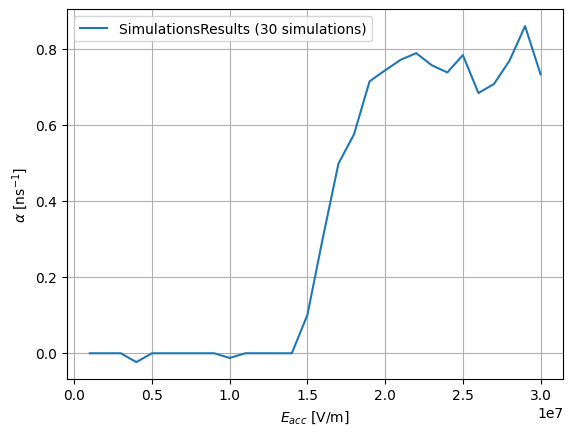

In [7]:
alpha_axes = results.plot(x="e_acc", y="alpha")